<a href="https://colab.research.google.com/github/harish-03-11/Bank-customer-leaveing-prediction/blob/main/Har_Bank_customer_leaveing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given: Bank customers dataset


Building a classifier which can determine whether they will leave in the next 6 months or not

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [210]:
df = pd.read_csv("/content/sample_data/archive.zip")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [211]:
#checking what are the unique values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [212]:
print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [213]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [214]:
df.replace({'Female': 1, "Male": 0},inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [215]:
df.drop(["CustomerId","RowNumber",'Surname','Geography'], axis = 1,inplace=True)

In [216]:
df1 = df

Text(0.5, 1.0, 'Customer Exited Prediction Visualiztion')

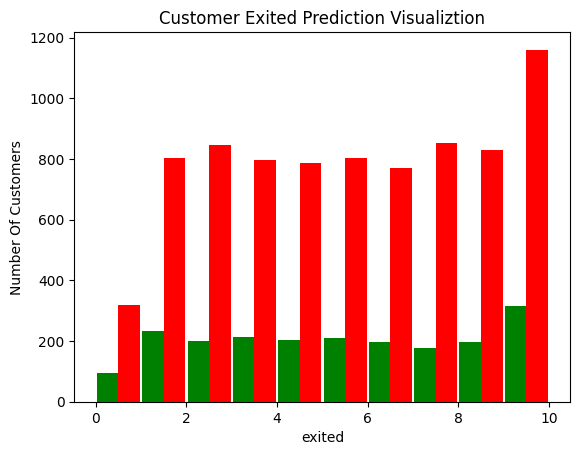

In [217]:
exited_no = df1[df1.Exited==0].Tenure
exited_yes = df1[df1.Exited==1].Tenure

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','red'],label=['Exited=0','Exited=1'])
plt.xlabel("exited")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

In [218]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [219]:
df1.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0


In [220]:
cols_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary','NumOfProducts','Age','Tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [221]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
5,0.590,0,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0
7,0.052,1,0.148649,0.4,0.458540,1.000000,1,0,0.596733,1
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0
9,0.668,0,0.121622,0.2,0.536488,0.000000,1,1,0.358605,0


In [222]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [223]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [224]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [225]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [226]:
import tensorflow as tf
from tensorflow import keras


In [227]:
df1.shape

(10000, 10)

In [228]:
df1.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.0,0.0,1,1,0.506735,1


In [229]:
X = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df1['Exited']

In [230]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [231]:
model = keras.Sequential([

              keras.layers.Dense(8, input_shape = (9,),activation="relu"),
              keras.layers.Dense(1,activation="sigmoid")

])

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train,y_train,epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7828 - loss: 0.5736
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.5021
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8023 - loss: 0.4755
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7951 - loss: 0.4728
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.4619
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8032 - loss: 0.4492
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.4352
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8126 - loss: 0.4258
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8140 - loss: 0.4238
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8189 - loss: 0.4163
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.4103
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [232]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8434 - loss: 0.3734


[0.37164148688316345, 0.8489999771118164]

In [233]:

yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.03144374],
       [0.06331204],
       [0.16296388],
       [0.10868922],
       [0.05785741]], dtype=float32)

In [234]:

y_test[:5]


,Exited
7054,0
442,0
3954,0
2288,0
3196,0


In [235]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [236]:

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [237]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.75      0.38      0.50       405

    accuracy                           0.85      2000
   macro avg       0.81      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

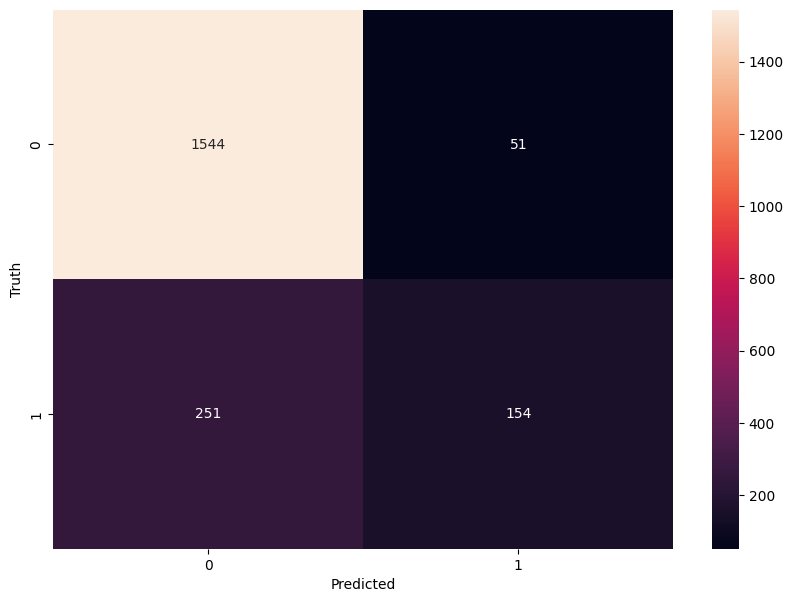

In [238]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [239]:
#Accuracy

In [240]:
round((1554+121)/(1554+121+41+282),2)

0.84